In [2]:
pwd

'/data2/mito_lineage/notebooks/jan21_2021'

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 


In [4]:
import os
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
#from src.calculate_AF_by_cell import calculate_af
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
#ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571

import glob
import numpy as np

Project Directory: /data2/mito_lineage


In [5]:
from matplotlib_venn import venn2
import seaborn as sns
import matplotlib.pyplot as plt
from mplh import cluster_help

fig_utils from mplh
here


In [6]:
os.chdir(ROOT_DIR)

## Files setup

#### Keep variants greater than mean heteroplasmy minimum parameter 'het'

In [7]:
het = 0.001

In [8]:
indir=join(RESULTS,"mttrace")
mapq = "MT"
num_reads = 200
cellr="True"
in_prefix = f'jan21_2021'
J2 = "J2"
P2 = "P2"
filt_id = "minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30"
lowC='10'

J2_indir = join(indir, in_prefix, J2,mapq,f"cellr_{cellr}")
P2_indir = join(indir, in_prefix, P2,mapq,f"cellr_{cellr}")

# sc_coverage_J2_f = join(J2_indir,"scPileup_concat_200",J2+"_200_all.coverage.txt.gz")
# sc_coverage_P2_f = join(P2_indir,"scPileup_concat_200",P2 + "_200_all.coverage.txt.gz")
coverage_J2_dir = join(indir, in_prefix, J2, mapq, f"{J2}_scPileup_{num_reads}")
coverage_P2_dir = join(indir, in_prefix, P2, mapq, f"{P2}_scPileup_{num_reads}")

concat_J2_dir = join(J2_indir,f"{J2}_{num_reads}")
concat_P2_dir = join(P2_indir,f"{P2}_{num_reads}")

#mgatk_variants_J2 = join(J2_indir,f'{J2}_{num_reads}',f'{J2}.af.tsv')
#mgatk_variants_P2 = join(P2_indir,f'{P2}_{num_reads}',f'{P2}.af.tsv')

filter_mgatk_variants_J2 = join(concat_J2_dir, "filters",filt_id,"filter_mgatk")
filter_mgatk_variants_P2 = join(concat_P2_dir, "filters",filt_id,"filter_mgatk")
P2_af = join(filter_mgatk_variants_P2, f"{P2}_lowC{lowC}.af.tsv")
J2_af = join(filter_mgatk_variants_J2, f"{J2}_lowC{lowC}.af.tsv")

In [9]:
glob.glob(filter_mgatk_variants_J2+'/*')

['/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/filter_mgatk/old_J2.variantQC.png',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/filter_mgatk/J2.signac.rds',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/filter_mgatk/old_J2.rds',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/filter_mgatk/J2.variant.rds',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/filter_mgatk/J2_lowC10.af.mgatk.tsv',
 '/data2/mito_lineage/data/processed/mttrace/jan21_2021/J2/MT/cellr_True/J2_200/filters/minC100_minR50_topN0_hetT0.01_hetC10_hetCount5_bq30/f

In [10]:
P2_AF_by_cell = pd.read_csv(P2_af, sep='\t')
print("Number of variants from mgatk", P2_AF_by_cell.shape[0])

#P2_AF_by_cell = P2_AF_by_cell.loc[~(P2_AF_by_cell<het).all(axis=1)]
P2_AF_by_cell = P2_AF_by_cell.loc[(P2_AF_by_cell.mean(axis=1)>=het)]
print(f"Number of variants after mean heteroplasmy of {het}: {P2_AF_by_cell.shape[0]}")
P2_AF_by_cell

Number of variants from mgatk 49704
Number of variants after mean heteroplasmy of 0.001: 117


,AAACGAAAGAGGTCCA-1,AAACGAAAGCGATACG-1,AAACGAAAGTCGTGAG-1,AAACGAACAATAGTGA-1,AAACGAACACAATAAG-1,AAACGAACACTGATAC-1,AAACGAACAGTAACCT-1,AAACGAACATCGTGAT-1,AAACGAAGTAACGGTG-1,AAACGAAGTAAGTCTC-1,...,TTTGTGTAGCCAGAAC-1,TTTGTGTCAGCAACCC-1,TTTGTGTCATGTATCG-1,TTTGTGTGTTTGCATG-1,TTTGTGTTCACTACCC-1,TTTGTGTTCCAAACCA-1,TTTGTGTTCCGATGCG-1,TTTGTGTTCCTAGAGT-1,TTTGTGTTCGCTCGGA-1,TTTGTGTTCTTCCACG-1
185G>A,0.969697,0.000000,0.0,1.000000,0.000000,0.0,0.0,1.0,0.882353,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.022727,0.0,0.000000,0.000000,0.0
318T>A,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
513G>A,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1888G>A,0.000000,0.000000,1.0,0.000000,0.897436,0.0,0.0,0.0,0.000000,1.0,...,0.0,0.000000,0.0,0.000000,0.055556,0.000000,0.0,0.928571,0.507692,0.0
1949G>A,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16111C>T,0.000000,0.981481,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.962963,1.0,1.000000,0.974359,1.000000,1.0,0.000000,0.000000,0.0
16223C>T,1.000000,0.995851,1.0,0.991935,1.000000,0.0,0.0,1.0,1.000000,1.0,...,1.0,1.000000,1.0,0.972973,1.000000,1.000000,1.0,1.000000,0.635294,0.0
16278C>T,1.000000,0.000000,0.0,0.958333,0.000000,0.0,0.0,1.0,1.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
16290C>T,0.000000,0.984456,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,1.0,1.000000,1.0,0.977778,1.000000,1.000000,1.0,0.000000,0.000000,0.0


Text(0.5, 1, 'PBMC P cells-by-variants')

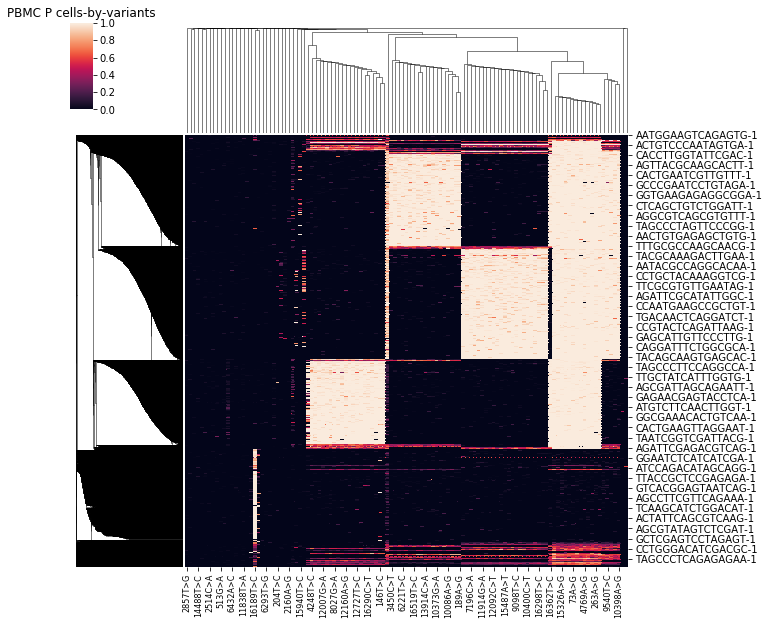

In [11]:
%matplotlib inline
cluster_help.plot_cluster(df=P2_AF_by_cell.transpose(), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True, vmin=0, vmax=1,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("P2 cells-by-variants")
#plt.savefig(join(outdir,"P2_variants.png"))

### D. AF Binarized and inclusion of high occuring variants

Text(0.5, 1, 'PBMC P cells-by-variants')

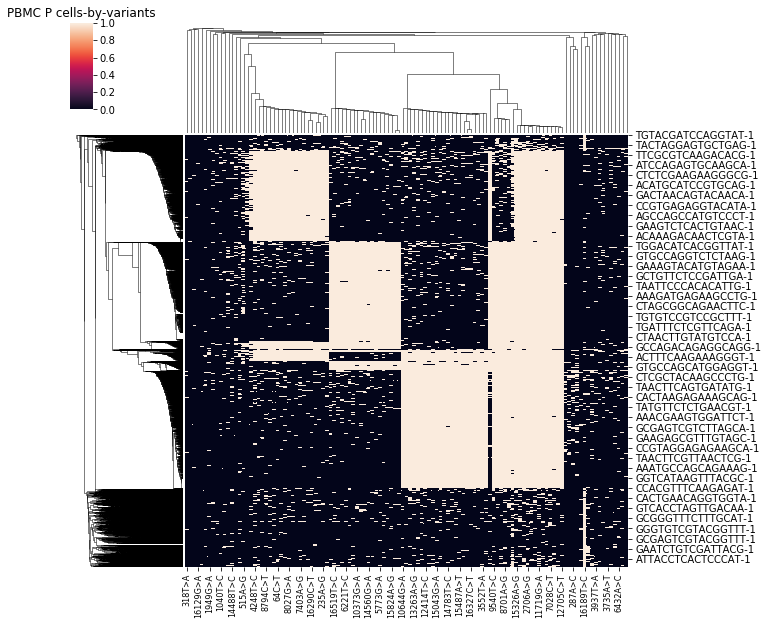

In [12]:
%matplotlib inline
bin_P2_AF_by_cell = P2_AF_by_cell.copy()
bin_P2_AF_by_cell[bin_P2_AF_by_cell>0] = 1
cluster_help.plot_cluster(df=bin_P2_AF_by_cell.transpose(), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("P2 cells-by-variants")
#plt.savefig(join(outdir,"P2_variants.png"))

## J2

In [13]:
J2_AF_by_cell = pd.read_csv(J2_af, sep='\t')
print("Number of variants from mgatk", J2_AF_by_cell.shape[0])
J2_AF_by_cell = J2_AF_by_cell.loc[(J2_AF_by_cell.mean(axis=1)>=het)]
print(f"Number of variants after mean heteroplasmy of {het}: {J2_AF_by_cell.shape[0]}")
J2_AF_by_cell

Number of variants from mgatk 49704
Number of variants after mean heteroplasmy of 0.001: 184


,AAACGAAAGAGCTCCC-1,AAACGAAAGCGATACG-1,AAACGAAAGGCTTCGC-1,AAACGAAAGTACAACA-1,AAACGAACAACGTACT-1,AAACGAACAAGCGGTA-1,AAACGAACACCTGGTG-1,AAACGAACACGATATC-1,AAACGAACACTTACAG-1,AAACGAACATTAAGGA-1,...,TTTGTGTGTGAATACA-1,TTTGTGTGTTTGACCA-1,TTTGTGTTCAAAGTAG-1,TTTGTGTTCCTAGAGT-1,TTTGTGTTCCTTTGCG-1,TTTGTGTTCGAGTTAC-1,TTTGTGTTCGCATAAC-1,TTTGTGTTCGTGGTAT-1,TTTGTGTTCGTTACAG-1,TTTGTGTTCTCCTTGG-1
185G>A,0.00,0.137255,0.574468,0.0,0.064935,0.0,0.121212,0.000000,0.666667,0.0,...,0.000000,0.000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.990000,1.000000
318T>A,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
513G>A,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.025,0.000000,0.0,0.000000,0.0,0.039216,0.0,0.000000,0.000000
1847T>A,0.00,0.000000,0.000000,0.0,0.010256,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1888G>A,1.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.052632,0.227273,1.0,...,0.000000,0.125,0.000000,0.0,0.000000,1.0,0.666667,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16111C>T,0.00,0.533333,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,1.000000,0.000,1.000000,0.0,0.926829,0.0,0.250000,1.0,0.034783,0.000000
16223C>T,1.00,1.000000,0.569620,1.0,0.121495,0.0,0.000000,0.000000,1.000000,1.0,...,0.994186,0.000,1.000000,0.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000
16278C>T,0.00,0.320388,0.274194,0.0,0.095238,0.0,0.000000,0.000000,0.631579,0.0,...,0.000000,0.000,0.083333,0.0,0.000000,0.0,0.000000,0.0,0.988166,0.945455
16290C>T,0.00,0.635417,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.959184,0.000,1.000000,0.0,1.000000,0.0,0.275862,1.0,0.000000,0.000000


### D. AF Binarized and inclusion of high occuring variants

Text(0.5, 1, 'PBMC J cells-by-variants')

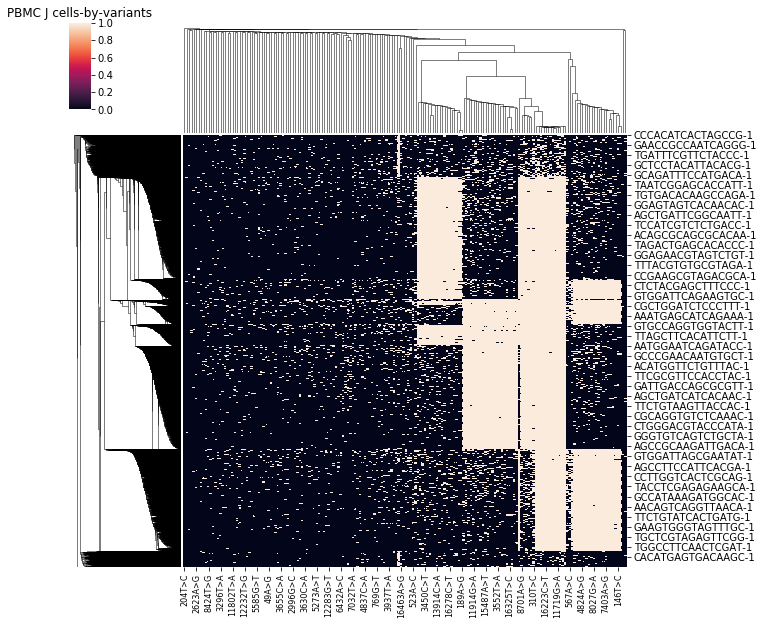

In [14]:
%matplotlib inline
bin_J2_AF_by_cell = J2_AF_by_cell.copy()
bin_J2_AF_by_cell[bin_J2_AF_by_cell>0] = 1
#bin_J2_AF_by_cell[bin_J2_AF_by_cell<0.05] = 0
cluster_help.plot_cluster(df=bin_J2_AF_by_cell.transpose(), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=True,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("J2 cells-by-variants")
#plt.savefig(join(outdir,"J2_variants.png"))

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Overlap of called variants')

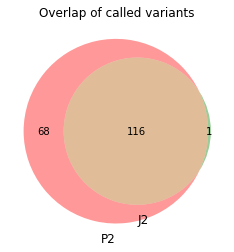

In [15]:

bin_J2_AF_by_cell.columns = bin_J2_AF_by_cell.columns + "_J2"
bin_P2_AF_by_cell.columns = bin_P2_AF_by_cell.columns + "_P2"
all_cells = pd.concat((bin_J2_AF_by_cell,bin_P2_AF_by_cell) ,axis=1)
all_cells_var_overlap = pd.concat((bin_J2_AF_by_cell,bin_P2_AF_by_cell) ,axis=0, join='inner')
overlap_variants = all_cells_var_overlap.columns.values


%matplotlib inline
venn2([set(bin_J2_AF_by_cell.index.values),set(bin_P2_AF_by_cell.index.values)],set_labels=["P2","J2"])
plt.title("Overlap of called variants")


## Get type of variant information

In [50]:
import src.utils.variant_utils as vu

In [79]:
variant_df = vu.type_of_variants(all_cells.index.values)
variant_positions = list(map(lambda x: int(x[:-3]), all_cells.index))
variant_df

,position,ref,alt,variant type,variant change
10086A>G,10086,A,G,Transition,A>G
10318T>C,10318,T,C,Transition,T>C
10373G>A,10373,G,A,Transition,G>A
10398A>G,10398,A,G,Transition,A>G
10400C>T,10400,C,T,Transition,C>T
...,...,...,...,...,...
9340T>G,9340,T,G,Transversion,T>G
9385A>C,9385,A,C,Transversion,A>C
9449C>T,9449,C,T,Transition,C>T
9540T>C,9540,T,C,Transition,T>C


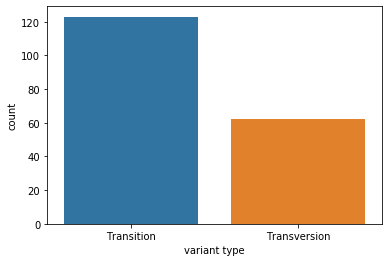

In [60]:
sns.countplot(variant_df["variant type"])

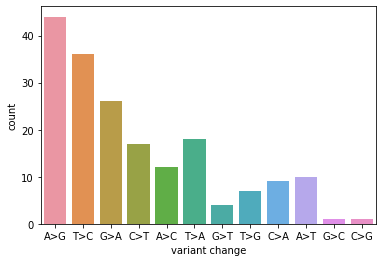

In [80]:
sns.countplot(variant_df["variant change"])

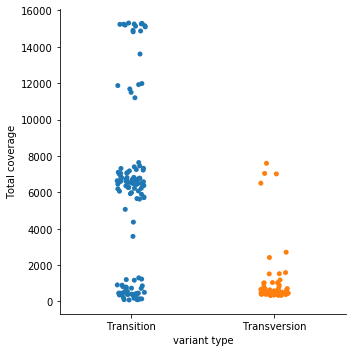

In [77]:
sns.catplot(x="variant type",y="Total coverage",
            data=pd.concat((variant_df,all_cells.sum(axis=1)), axis=1).rename({0:"Total coverage"}, axis=1))

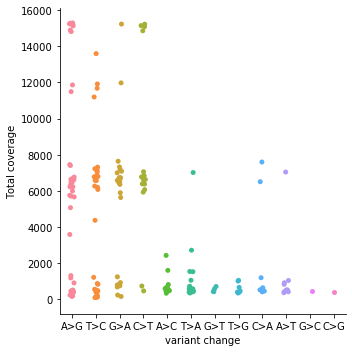

In [81]:
sns.catplot(x="variant change",y="Total coverage",
            data=pd.concat((variant_df,all_cells.sum(axis=1)), axis=1).rename({0:"Total coverage"}, axis=1))

In [16]:
cell_inds = {}
for ind, val in enumerate([bin_J2_AF_by_cell.columns.values,bin_P2_AF_by_cell.columns.values]):
    for j in val:
        cell_inds[j] = ind
pd.Series(cell_inds)

AAACGAAAGAGCTCCC-1_J2    0
AAACGAAAGCGATACG-1_J2    0
AAACGAAAGGCTTCGC-1_J2    0
AAACGAAAGTACAACA-1_J2    0
AAACGAACAACGTACT-1_J2    0
                        ..
TTTGTGTTCCAAACCA-1_P2    1
TTTGTGTTCCGATGCG-1_P2    1
TTTGTGTTCCTAGAGT-1_P2    1
TTTGTGTTCGCTCGGA-1_P2    1
TTTGTGTTCTTCCACG-1_P2    1
Length: 17380, dtype: int64

In [17]:
colors = {0:"J", 1:"P"}
cell_colors = pd.Series(cell_inds).map(colors)

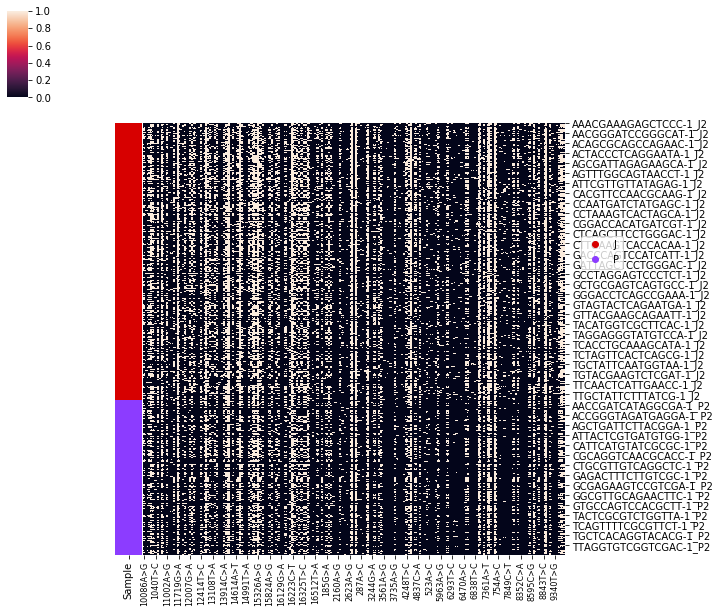

In [18]:
cluster_help.plot_cluster(df=all_cells.fillna(0).transpose(), 
                 fsave=None, to_z=False, to_col_clust=False, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=False, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')

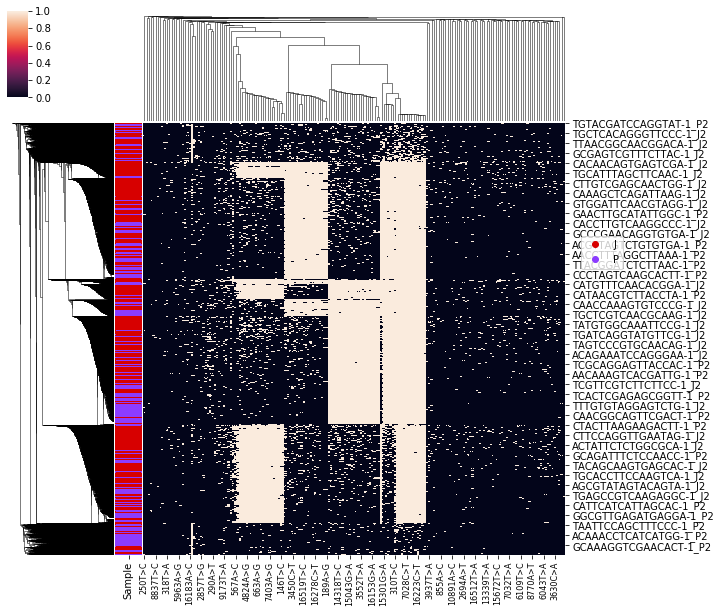

In [19]:
cluster_help.plot_cluster(df=all_cells.fillna(0).transpose(), 
                 fsave=None, to_z=False, to_col_clust=True, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')

## Relate this to coverage

In [25]:
J2_depth = pd.read_csv(join(filter_mgatk_variants_J2,"J2_lowC10.coverage.tsv"), index_col=0, sep='\t')
J2_depth.columns = np.arange(1, J2_depth.shape[1]+1)
P2_depth = pd.read_csv(join(filter_mgatk_variants_P2,"P2_lowC10.coverage.tsv"), index_col=0,sep='\t')
P2_depth.columns = np.arange(1, P2_depth.shape[1]+1)
J2_depth.index = J2_depth.index + "_J2"
P2_depth.index = P2_depth.index + "_P2"

Text(0.5, 1.0, 'P2 log10 cell total coverage over all variants called')

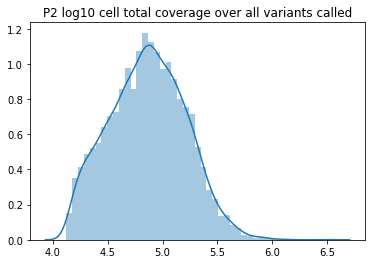

In [44]:
sns.distplot(np.log10(P2_depth.sum(axis=0)+1))
plt.title("P2 log10 cell total coverage over all variants called")

Text(0.5, 1.0, 'J2 log10 cell total coverage over all variants called')

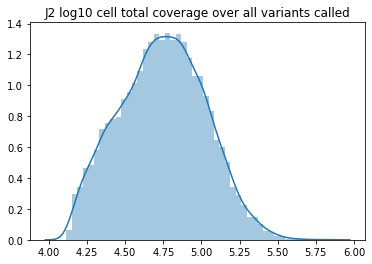

In [46]:
sns.distplot(np.log10(J2_depth.sum(axis=0)+1))
plt.title("J2 log10 cell total coverage over all variants called")

In [39]:
P2_depth = P2_depth.loc[~((P2_depth.sum(axis=1)==0))]


In [40]:
J2_depth = J2_depth.loc[~((J2_depth.sum(axis=1)==0))]


Text(0.5, 1, 'J cells-by-Position Depth')

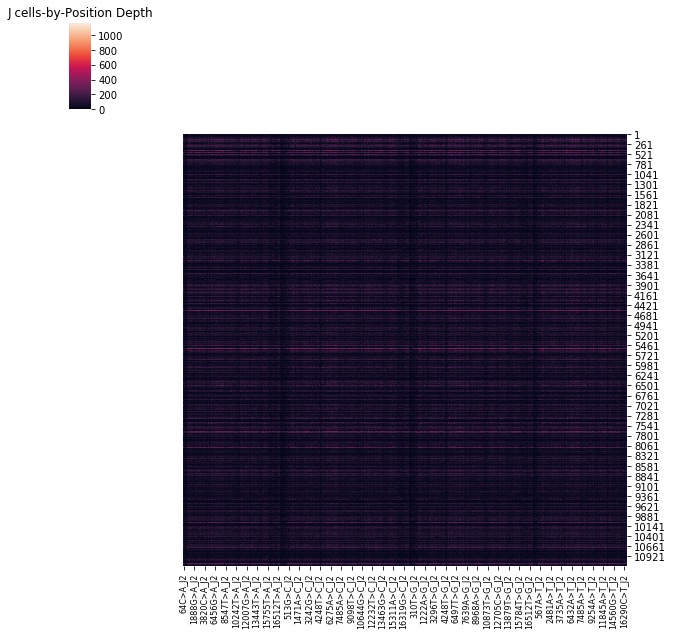

In [42]:
%matplotlib inline
cluster_help.plot_cluster(df=(J2_depth.transpose()), row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=False, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')
plt.title("J cells-by-Position Depth")
#plt.savefig(join(outdir,"J2_variants.png"))

## AF-Depth in same positions

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


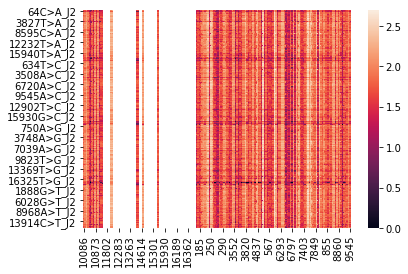

In [82]:
sns.heatmap(np.log10(J2_depth.loc[:, variant_positions]+1))

In [84]:

all_cells_depth = pd.concat((J2_depth.transpose(),P2_depth.transpose()) ,axis=1).transpose()
# cluster_help.plot_cluster(df=all_cells_depth, 
#                  fsave=None, to_z=False, to_col_clust=False, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
#                  to_row_clust=False, name=None, col_names=True,
#                  row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')

In [87]:
all_cells_depth

,1,2,3,4,5,6,7,8,9,10,...,11166,11167,11168,11169,11170,11171,11172,11173,11174,11175
64C>A_J2,78.0,107.0,117.0,64.0,238.0,41.0,101.0,72.0,108.0,45.0,...,148.0,71.0,70.0,52.0,119.0,68.0,42.0,29.0,201.0,70.0
103G>A_J2,81.0,96.0,138.0,53.0,210.0,37.0,102.0,80.0,106.0,46.0,...,155.0,80.0,80.0,43.0,105.0,67.0,44.0,23.0,188.0,70.0
146T>A_J2,33.0,56.0,73.0,30.0,114.0,28.0,67.0,28.0,30.0,18.0,...,77.0,27.0,39.0,10.0,113.0,30.0,14.0,10.0,142.0,28.0
185G>A_J2,17.0,51.0,47.0,19.0,77.0,22.0,66.0,24.0,36.0,17.0,...,54.0,22.0,14.0,4.0,81.0,48.0,15.0,11.0,100.0,30.0
204T>A_J2,15.0,50.0,43.0,17.0,88.0,14.0,52.0,26.0,52.0,18.0,...,34.0,21.0,16.0,4.0,75.0,50.0,19.0,15.0,85.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16387A>T_P2,123.0,244.0,22.0,80.0,69.0,44.0,39.0,427.0,69.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16441A>T_P2,128.0,284.0,38.0,132.0,75.0,53.0,38.0,567.0,45.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16463A>T_P2,120.0,252.0,38.0,136.0,77.0,52.0,34.0,512.0,49.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16497A>T_P2,95.0,254.0,20.0,126.0,65.0,50.0,22.0,567.0,43.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
cluster_help.plot_cluster(df=np.log10(all_cells_depth.loc[:, variant_positions]+1), 
                 fsave=None, to_z=False, to_col_clust=False, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=False, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None, metric='jaccard')

KeyError: "None of [Int64Index([10086, 10318, 10373, 10398, 10400,  1040, 10644,  1082, 10873,\n            10891,\n            ...\n             8843,  8860,  9087,  9098,  9173,  9340,  9385,  9449,  9540,\n             9545],\n           dtype='int64', length=185)] are in the [columns]"

In [ ]:
cluster_help.plot_cluster(df=np.log10(all_cells_depth.loc[:, variant_positions]+1), 
                 fsave=None, to_z=False, to_col_clust=False, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)

## Collect only the high AFs
80% of cells > 0.8 AF

In [ ]:
all_cells_af = pd.concat((J2_AF_by_cell,P2_AF_by_cell) ,axis=1)
all_cells_af = all_cells_af.fillna(0)
overlap_variants = all_cells_var_overlap.columns.values

cell_thresh = 0.8*all_cells.shape[1]
high_af_cells = all_cells[(all_cells > 0.8).sum(axis=1)>cell_thresh]
variants_meta = pd.DataFrame(list(map(lambda x: [x[:-3], *(x[-3:].split(">"))], high_af_cells.index)), columns=["Position", "Reference", "Alternative"], index=high_af_cells.index)
high_af_cells

In [ ]:
variants_meta.head()

In [ ]:
cluster_help.plot_cluster(df=high_af_cells.transpose(), 
                 fsave=None, to_z=False, to_col_clust=True, row_meta=pd.DataFrame(cell_colors, columns=["Sample"]),
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)

In [ ]:
# sparse_P2_df = pd.read_csv(join(P2_indir, f"{P2}_{num_reads}", f"{P2}.A.strands.txt.gz"), header=None)
# sparse_P2_df["Nt"] = "A"
# curr = pd.read_csv(join(P2_indir, f"{P2}_{num_reads}", f"{P2}.C.strands.txt.gz"), header=None)
# curr["Nt"] = "C"
# sparse_P2_df = pd.conccat((sparse_P2_df, curr), axis=0)

# curr = pd.read_csv(join(P2_indir, f"{P2}_{num_reads}", f"{P2}.G.strands.txt.gz"), header=None)
# curr["Nt"] = "G"
# sparse_P2_df = pd.conccat((sparse_P2_df, curr), axis=0)
# curr = pd.read_csv(join(P2_indir, f"{P2}_{num_reads}", f"{P2}.T.strands.txt.gz"), header=None)
# curr["Nt"] = "T"
# sparse_P2_df = pd.conccat((sparse_P2_df, curr), axis=0)
# sparse_P2_df 

sparse_P2 = {}
sparse_P2['A'] = pd.read_csv(join(P2_indir, f"{P2}_{num_reads}", f"{P2}.A.strands.txt.gz"), header=None)
sparse_P2['C'] = pd.read_csv(join(P2_indir, f"{P2}_{num_reads}", f"{P2}.C.strands.txt.gz"), header=None)
sparse_P2['G'] = pd.read_csv(join(P2_indir, f"{P2}_{num_reads}", f"{P2}.G.strands.txt.gz"), header=None)
sparse_P2['T'] = pd.read_csv(join(P2_indir, f"{P2}_{num_reads}", f"{P2}.T.strands.txt.gz"), header=None)


sparse_P2["A"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_P2["C"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_P2["G"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_P2["T"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]


sparse_J2 = {}
sparse_J2['A'] = pd.read_csv(join(J2_indir, f"{J2}_{num_reads}", f"{J2}.A.strands.txt.gz"), header=None)
sparse_J2['C'] = pd.read_csv(join(J2_indir, f"{J2}_{num_reads}", f"{J2}.C.strands.txt.gz"), header=None)
sparse_J2['G'] = pd.read_csv(join(J2_indir, f"{J2}_{num_reads}", f"{J2}.G.strands.txt.gz"), header=None)
sparse_J2['T'] = pd.read_csv(join(J2_indir, f"{J2}_{num_reads}", f"{J2}.T.strands.txt.gz") ,header=None)

sparse_J2["A"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_J2["C"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_J2["G"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]
sparse_J2["T"].columns = ["Position", "Cell", "+ Count", "+ BQ", "- Count", "- BQ"]



for nt in sparse_J2.keys():
    sparse_J2[nt]["Cell"] = sparse_J2[nt]["Cell"] + "_J2"

for nt in sparse_P2.keys():
    sparse_P2[nt]["Cell"] = sparse_P2[nt]["Cell"] + "_P2"

    

In [ ]:
bq_pos = {}
P2_sparse_pos = {}
sparse_pos = {}
for ind, val in variants_meta.groupby("Alternative"):
    curr_bq = sparse_P2[ind][(sparse_P2[ind]["Position"].isin(val["Position"]))]
    sparse_pos[ind] = curr_bq
    P2_sparse_pos[ind] = curr_bq
    bq_pos[ind] = ((curr_bq["+ BQ"]) + (curr_bq["+ BQ"]))/2
    
J2_sparse_pos = {}
for ind, val in variants_meta.groupby("Alternative"):
    curr_bq = sparse_J2[ind][(sparse_J2[ind]["Position"].isin(val["Position"]))]
    J2_sparse_pos[ind] = curr_bq

In [ ]:
sns.pairplot(curr_bq,vars=["+ Count", "+ BQ", "- Count", "- BQ"])

In [ ]:
bq_pos[ind][bq_pos[ind]<30].index

In [ ]:
variants_meta["Position"] = variants_meta["Position"].astype(int)
curr_vars = sparse_pos[ind][sparse_pos[ind]["+ BQ"]< 30]
curr_vars = curr_vars[curr_vars["Position"].isin(variants_meta["Position"])]
curr_vars

In [ ]:
curr_vars.shape

## Merge the AF with quality

In [ ]:
# def get_name(df,col='index'):
#     vals =  list(map(lambda x: (x[:-3], x[-3:].split(">")[0], x.split(">")[-1]), 
#                                         df[col]))
#     return pd.concat((df,pd.DataFrame(vals, columns=["Position","Referenece", "Alternative"])), axis=1)

# sparse_full = pd.DataFrame()


# for curr_ind in ["A", "C", "G", "T"]:
#     #curr_ind = "A"
#     curr_sparse = sparse_pos[curr_ind][sparse_pos[curr_ind]["Position"].isin(variants_meta["Position"])]#[sparse_pos[curr_ind]["Alternative"]==]

#     high_af_cells_sparse = high_af_cells.reset_index().melt(id_vars="index", var_name="Cell", value_name="AF")
#     high_af_cells_sparse  = get_name(high_af_cells_sparse)
#     high_af_cells_sparse

#     curr_sparse_af = pd.merge(curr_sparse, high_af_cells_sparse.astype({"Position":int}), on=["Position","Cell"],how="inner")
#     curr_sparse_af["log + Count"] = np.log2(curr_sparse_af["+ Count"])
#     curr_sparse_af["log - Count"] = np.log2(curr_sparse_af["- Count"])
#     curr_sparse_af
#     print(curr_sparse_af.shape)
#     sparse_full = pd.concat((sparse_full, curr_sparse_af), axis=0)
# sparse_full

In [ ]:
curr_sparse

In [ ]:
high_af_cells.head()


In [ ]:
sample[1]

In [ ]:
def get_name(df,col='index'):
    vals =  list(map(lambda x: (x[:-3], x[-3:].split(">")[0], x.split(">")[-1]), 
                                        df[col]))
    return pd.concat((df,pd.DataFrame(vals, columns=["Position","Referenece", "Alternative"])), axis=1)

sparse_full_both_samples = pd.DataFrame()

for sample in [('J', J2_sparse_pos), ('P', P2_sparse_pos)]:
    for curr_ind in ["A", "C", "G", "T"]:
        #curr_ind = "A"
        curr_sparse = sample[1][curr_ind][sample[1][curr_ind]["Position"].isin(variants_meta["Position"])]#[sample[curr_ind]["Alternative"]==]
        high_af_cells_sparse = high_af_cells.reset_index().melt(id_vars="index", var_name="Cell", value_name="AF")
        
        high_af_cells_sparse  = get_name(high_af_cells_sparse)
        high_af_cells_sparse
        
        high_af_cells_sparse["Sample"] = sample[0]
        curr_sparse_af = pd.merge(curr_sparse, high_af_cells_sparse.astype({"Position":int}), on=["Position","Cell"],how="inner")
        curr_sparse_af["log + Count"] = np.log2(curr_sparse_af["+ Count"])
        curr_sparse_af["log - Count"] = np.log2(curr_sparse_af["- Count"])
        curr_sparse_af
        print(curr_sparse_af.shape)
        sparse_full_both_samples = pd.concat((sparse_full_both_samples, curr_sparse_af), axis=0)
sparse_full_both_samples

In [ ]:
sparse_full['Position'].unique()

## Both samples

In [ ]:
sns.pairplot(curr_sparse_af[["+ BQ", "AF", "log + Count", "- BQ","log - Count", "Position"]], hue="Position")